In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Dataset.csv")

In [3]:
data.head()

,Unnamed: 0,SHA,Magic,File Type,File Size,Creation Time,Last Analysis,No. of Names,Signature Info,Target,...,Registry Keys opened,Registry Keys deleted,Shell commands,Processes created,Processes terminated,Services opened,Services created,Mutexes created,Mutexes opened,Class
0,0,b1fd9e79f22a7085af1a127b11fe15d05eeded2c0efca7...,PE32+ executable for MS Windows (DLL) (GUI) Mo...,Win32 DLL,13.96 KB (14296 bytes),NaN,NaN,2,1,NaN,...,0,0,0,0,0,0,0,0,0,benign
1,1,321cb38eff1a85a0426dcf28707352af86078c810cee36...,"MS-DOS executable, MZ for MS-DOS",Win32 EXE,76.22 KB (78048 bytes),1987-09-11 01:35:02,2020-05-09 13:13:19,8,-1,Intel 386 or later processors and compatible p...,...,10,0,0,0,0,0,0,1,8,malware
2,2,663404cd54c9a0e7d4c278638f2de59e1970df9e80c1c3...,PE32 executable for MS Windows (GUI) Intel 803...,Win32 EXE,50.50 KB (51712 bytes),1999-11-23 03:10:42,2020-05-11 01:43:34,10,-1,Intel 386 or later processors and compatible p...,...,0,0,0,0,0,0,0,0,0,malware
3,3,160fed659b4c9b24d0052e24bebfdc76a909c70636ef85...,NaN,NaN,NaN,NaN,NaN,0,-1,NaN,...,10,0,0,0,0,0,0,10,0,benign
4,4,32be84189044725082165df81f97fcb442867948d75dd7...,PE32 executable for MS Windows (GUI) Intel 803...,Win32 EXE,165.75 KB (169727 bytes),2004-08-05 21:49:16,2020-04-18 18:16:49,10,1,Intel 386 or later processors and compatible p...,...,10,3,0,0,0,1,0,10,9,malware


In [4]:
#drop extra Index columns
data=data.drop(["Unnamed: 0","Last Analysis","Creation Time","SHA"],axis=1)

In [5]:
data.head()

,Magic,File Type,File Size,No. of Names,Signature Info,Target,Entry Point,Max Entropy,Min Entropy,Mean Entropy,...,Registry Keys opened,Registry Keys deleted,Shell commands,Processes created,Processes terminated,Services opened,Services created,Mutexes created,Mutexes opened,Class
0,PE32+ executable for MS Windows (DLL) (GUI) Mo...,Win32 DLL,13.96 KB (14296 bytes),2,1,NaN,NaN,5.68,2.65,4.032,...,0,0,0,0,0,0,0,0,0,benign
1,"MS-DOS executable, MZ for MS-DOS",Win32 EXE,76.22 KB (78048 bytes),8,-1,Intel 386 or later processors and compatible p...,536028.0,0.00,100000.00,0.000,...,10,0,0,0,0,0,0,1,8,malware
2,PE32 executable for MS Windows (GUI) Intel 803...,Win32 EXE,50.50 KB (51712 bytes),10,-1,Intel 386 or later processors and compatible p...,4096.0,6.53,0.00,3.204,...,0,0,0,0,0,0,0,0,0,malware
3,NaN,NaN,NaN,0,-1,NaN,NaN,0.00,100000.00,0.000,...,10,0,0,0,0,0,0,10,0,benign
4,PE32 executable for MS Windows (GUI) Intel 803...,Win32 EXE,165.75 KB (169727 bytes),10,1,Intel 386 or later processors and compatible p...,6805.0,7.59,7.59,7.590,...,10,3,0,0,0,1,0,10,9,malware


In [6]:
#Data Description
data.describe()

,No. of Names,Signature Info,Entry Point,Max Entropy,Min Entropy,Mean Entropy,Total Size Diffrence,Imports,Contained Resources By Language,Overlay Present,...,Files dropped,Registry Keys opened,Registry Keys deleted,Shell commands,Processes created,Processes terminated,Services opened,Services created,Mutexes created,Mutexes opened
count,10558.000000,10558.000000,6.934000e+03,9883.000000,9883.000000,9883.000000,8.245000e+03,6117.000000,6009.000000,8245.000000,...,10558.000000,10558.000000,10558.000000,10558.000000,10558.000000,10558.000000,10558.000000,10558.000000,10558.000000,10558.000000
mean,5.497253,-0.174086,2.694894e+05,4.137464,34302.475610,2.769948,1.322273e+06,38.865947,1.351140,-0.026076,...,0.262076,2.288217,0.345899,0.013071,0.218413,0.260940,0.136484,0.013071,1.924986,0.820515
std,4.259035,0.984777,2.271216e+06,3.088377,47473.158312,2.201737,6.822647e+07,26.729576,0.741698,0.999721,...,2.095472,4.153673,1.259191,0.120856,0.931404,0.927009,0.723254,0.120856,3.491211,2.279738
min,0.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,6.678250e+03,0.000000,0.540000,0.000000,7.120000e+02,14.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,-1.000000,3.206800e+04,5.900000,3.210000,3.358000,2.340000e+03,33.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1.000000,1.766285e+05,6.450000,100000.000000,4.595000,9.728000e+03,63.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,17.000000,1.000000,1.704960e+08,8.000000,100000.000000,7.990000,4.278204e+09,108.000000,10.000000,1.000000,...,20.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000


In [7]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10558 entries, 0 to 10557
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Magic                            8245 non-null   object 
 1   File Type                        8245 non-null   object 
 2   File Size                        8245 non-null   object 
 3   No. of Names                     10558 non-null  int64  
 4   Signature Info                   10558 non-null  int64  
 5   Target                           6934 non-null   object 
 6   Entry Point                      6934 non-null   float64
 7   Max Entropy                      9883 non-null   float64
 8   Min Entropy                      9883 non-null   float64
 9   Mean Entropy                     9883 non-null   float64
 10  Total Size Diffrence             8245 non-null   float64
 11  Imports                          6117 non-null   float64
 12  Contained Resource

In [8]:
data.isnull().sum()

Magic                              2313
File Type                          2313
File Size                          2313
No. of Names                          0
Signature Info                        0
Target                             3624
Entry Point                        3624
Max Entropy                         675
Min Entropy                         675
Mean Entropy                        675
Total Size Diffrence               2313
Imports                            4441
Contained Resources By Language    4549
Overlay Present                    2313
Contacted Domains                     0
Contacted IP Addresses                0
Contacted URLs                        0
Execution Parents                     0
PE Resource Parents                   0
Bundled Files                         0
PE Resource Children                  0
DNS Resolutions                       0
http request                          0
Files opened                          0
Files written                         0


## Filling Null Values

In [9]:
data["Total Size Diffrence"].fillna(0,inplace=True)        

In [10]:
data["Total Size Diffrence"].isnull().sum()

0

In [11]:
data['File Size'].fillna("0 KB",inplace=True)
data['File Size'].isnull().sum()

0

In [12]:
def fill(i):
    m=i.split(" ")
    if(m[1].lower()=="mb"):
        #print(m[1])
        return 1000*float(m[0])
    return float(m[0])    

In [13]:
data['File Size']=data['File Size'].apply(fill)

In [14]:
data['File Size']

0         13.96
1         76.22
2         50.50
3          0.00
4        165.75
          ...  
10553    308.00
10554    278.00
10555     49.50
10556    207.40
10557     97.00
Name: File Size, Length: 10558, dtype: float64

In [15]:
data['File Size'].astype('float')

0         13.96
1         76.22
2         50.50
3          0.00
4        165.75
          ...  
10553    308.00
10554    278.00
10555     49.50
10556    207.40
10557     97.00
Name: File Size, Length: 10558, dtype: float64

In [16]:
data["Max Entropy"]

0        5.68
1        0.00
2        6.53
3        0.00
4        7.59
         ... 
10553    0.00
10554     NaN
10555    6.27
10556    6.65
10557    7.99
Name: Max Entropy, Length: 10558, dtype: float64

In [17]:
def replace(i):
    if(i==0.00):
        return None
    return i

In [18]:
data["Max Entropy"]=data["Max Entropy"].apply(replace)

In [19]:
data["Max Entropy"]

0        5.68
1         NaN
2        6.53
3         NaN
4        7.59
         ... 
10553     NaN
10554     NaN
10555    6.27
10556    6.65
10557    7.99
Name: Max Entropy, Length: 10558, dtype: float64

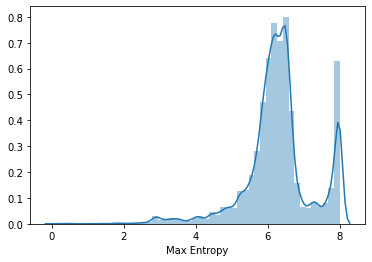

In [20]:
sns.distplot(data["Max Entropy"])

### Since this is a right skewed distribution curve we replace the null values with the median of the attribute

In [21]:
data["Max Entropy"].fillna(data["Max Entropy"].median(),inplace=True)

In [22]:
def con(i):
    if(i==100000.0):
        return None
    return i

In [23]:
data["Min Entropy"]=data["Min Entropy"].apply(con)

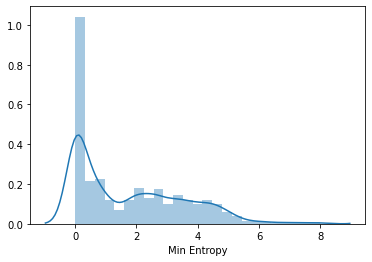

In [24]:
sns.distplot(data["Min Entropy"])

### Since this is a Left Skewed distribution curve we replace the null values with the median of the attribute

In [25]:
data["Min Entropy"].fillna(data["Min Entropy"].median(),inplace=True)

In [26]:
data["Mean Entropy"]=data["Mean Entropy"].apply(replace)

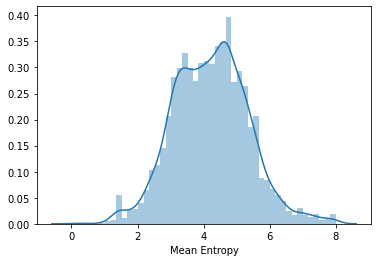

In [27]:
sns.distplot(data["Mean Entropy"])

### Since this is a Normal distribution curve we replace the null values with the mean of the attribute

In [28]:
data["Mean Entropy"].fillna(data["Mean Entropy"].mean(),inplace=True)

In [29]:
data["Imports"].fillna(0,inplace=True)
data["Contained Resources By Language"].fillna(0,inplace=True)
data["Overlay Present"].fillna(-1,inplace=True)

In [30]:
data["Magic"].fillna(" ",inplace=True)
data["Target"].fillna(" ",inplace=True)
data["File Type"].fillna(" ",inplace=True)
data["Entry Point"].fillna(0,inplace=True)

## Spliting dependent and independent Variables
### Here dependent variable is the "Class" and rest all are independent variables and then go for encoding

In [31]:
indp=data.iloc[:,:-1].values
dep=data.iloc[:,-1].values

### Label Encoding of Class Variable 

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
dep = le.fit_transform(dep)
dep

array([0, 1, 1, ..., 1, 0, 1])

###  One hot encoding of "Magic", "File Type","Target"

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [35]:
ct = ColumnTransformer([("ohe",OneHotEncoder(drop="first"),[0,1,5])],remainder="passthrough")
indp = ct.fit_transform(indp)

### Scaling the data...

In [36]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms_indp = ms.fit_transform(indp)
ms_indp

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.1, 0.8],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.8, 0.1]])

## Now we split the cleaned dataset into train and test 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(indp,dep,test_size=0.2,random_state=1)

In [39]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((8446, 96), (8446,), (2112, 96), (2112,))

## Now we implement Deep Learning Algorithms on processed data

### 1) Multilayer Perceptron Network

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [41]:
clf=MLPClassifier(hidden_layer_sizes=(80,),max_iter=7000,alpha=0.1,learning_rate='invscaling') #(100,100), 300


In [42]:
clf.fit(X_train,Y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(80,), learning_rate='invscaling',
              max_iter=7000)

In [43]:
preds=clf.predict(X_test)

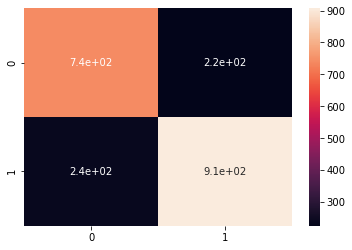

In [44]:
lr_con = confusion_matrix(preds,Y_test)
sns.heatmap(lr_con, annot=True)

In [46]:
accuracy_score(preds,Y_test)

0.7807765151515151